# Bank Personal Loan Modeling


# Import libraries

In [1]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = '/kaggle/input/bank-personal-loan-modeling-mit-fall402/Bank_Personal_Loan_Modelling.csv'
Df = pd.read_csv(data_path) 
Df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [3]:
Df.shape

(5000, 14)

In [4]:
Df.head(10)

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   
5   6   37          13      29     92121       4  0/40          2       155   
6   7   53          27      72     91711       2  1/50          2         0   
7   8   50          24      22     93943       1  0/30          3         0   
8   9   35          10      81     90089       3  0/60          2       104   
9  10   34           9     180     93023       1  8/90          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [6]:
Df.describe(include ='all' )

ID          Age   Experience       Income      ZIP Code  \
count   5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.500000    45.338400    20.104600    73.774200  93152.503000   
std     1443.520003    11.463166    11.467954    46.033729   2121.852197   
min        1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%     1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%     2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%     3750.250000    55.000000    30.000000    98.000000  94608.000000   
max     5000.000000    67.000000    43.000000   224.000000  96651.000000   

             Family CCAvg    Education     Mortgage  Personal Loan  \
count   5000.000000  5000  5000.000000  5000.000000    5000.000000   
unique          NaN   108          NaN          NaN            NaN   
top             NaN  0/30          NaN          NaN            NaN   
freq            NaN   241          NaN          NaN            NaN   
mean       2.396400   NaN     1.881000    56.498800       0.096000   
std        1.147663   NaN     0.839869   101.713802       0.294621   
min        1.000000   NaN     1.000000     0.000000       0.000000   
25%        1.000000   NaN     1.000000     0.000000       0.000000   
50%        2.000000   NaN     2.000000     0.000000       0.000000   
75%        3.000000   NaN     3.000000   101.000000       0.000000   
max        4.000000   NaN     3.000000   635.000000       1.000000   

        Securities Account  CD Account       Online   CreditCard  
count          5000.000000  5000.00000  5000.000000  5000.000000  
unique                 NaN         NaN          NaN          NaN  
top                    NaN         NaN          NaN          NaN  
freq                   NaN         NaN          NaN          NaN  
mean              0.104400     0.06040     0.596800     0.294000  
std               0.305809     0.23825     0.490589     0.455637  
min               0.000000     0.00000     0.000000     0.000000  
25%               0.000000     0.00000     0.000000     0.000000  
50%               0.000000     0.00000     1.000000     0.000000  
75%               0.000000     0.00000     1.000000     1.000000  
max               1.000000     1.00000     1.000000     1.000000

In [7]:
##missing value
Df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 

# 

# Preprocessing

### Replace String To Float

In [8]:
Data = Df.copy()

In [9]:
##other way to CCAvg' is the column  want to convert to float
Data['CCAvg'] = Data['CCAvg'].str.replace('/', '.')
Data['CCAvg'] = Data['CCAvg'].astype(float)

In [10]:
Data["CCAvg"]

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64

In [11]:
###We calculate the "CCAvg" on an annual basis by considering the year to be 12 months
Data["CCAvg"]= Data["CCAvg"]*12
Data["CCAvg"]

0       19.2
1       18.0
2       12.0
3       32.4
4       12.0
        ... 
4995    22.8
4996     4.8
4997     3.6
4998     6.0
4999     9.6
Name: CCAvg, Length: 5000, dtype: float64

In [12]:
Data["CCAvg"].describe()

count    5000.000000
mean       23.255256
std        20.971908
min         0.000000
25%         8.400000
50%        18.000000
75%        30.000000
max       120.000000
Name: CCAvg, dtype: float64

In [13]:
## Delete "ID" Column
Data.drop(columns=['ID'], inplace=True)

##### Delete the ID column as it doesn't provide us with any specific information.

## Converting negatives to positives

In [14]:
###Using the absolute value function to convert negative values to positive ones.
Data['Experience'] = Data['Experience'].abs()

In [15]:
Data["Experience"].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [17]:
###missing value
Data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
Data.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200  93152.503000     2.396400   
std      11.463166    11.415189    46.033729   2121.852197     1.147663   
min      23.000000     0.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean     23.255256     1.881000    56.498800       0.096000   
std      20.971908     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       8.400000     1.000000     0.000000       0.000000   
50%      18.000000     2.000000     0.000000       0.000000   
75%      30.000000     3.000000   101.000000       0.000000   
max     120.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [19]:
Data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

# 

# 

# Type of Columns

## Numerical

In [20]:
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
n_cols = 4  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5)) 
fig.tight_layout(pad=5.0)
palette = "Set2" 

for i, col in enumerate(numerical_columns):
    row = i // n_cols
    col_num = i % n_cols
    sns.boxplot(x=col, data=Data, ax=axes[row, col_num], palette=palette)
    axes[row, col_num].set_title(col)
for j in range(i + 1, n_rows * n_cols):
    if row < n_rows - 1 or (row == n_rows - 1 and j % n_cols != 0):
        axes[row, j % n_cols].set_visible(False)
plt.show()

## Categorical

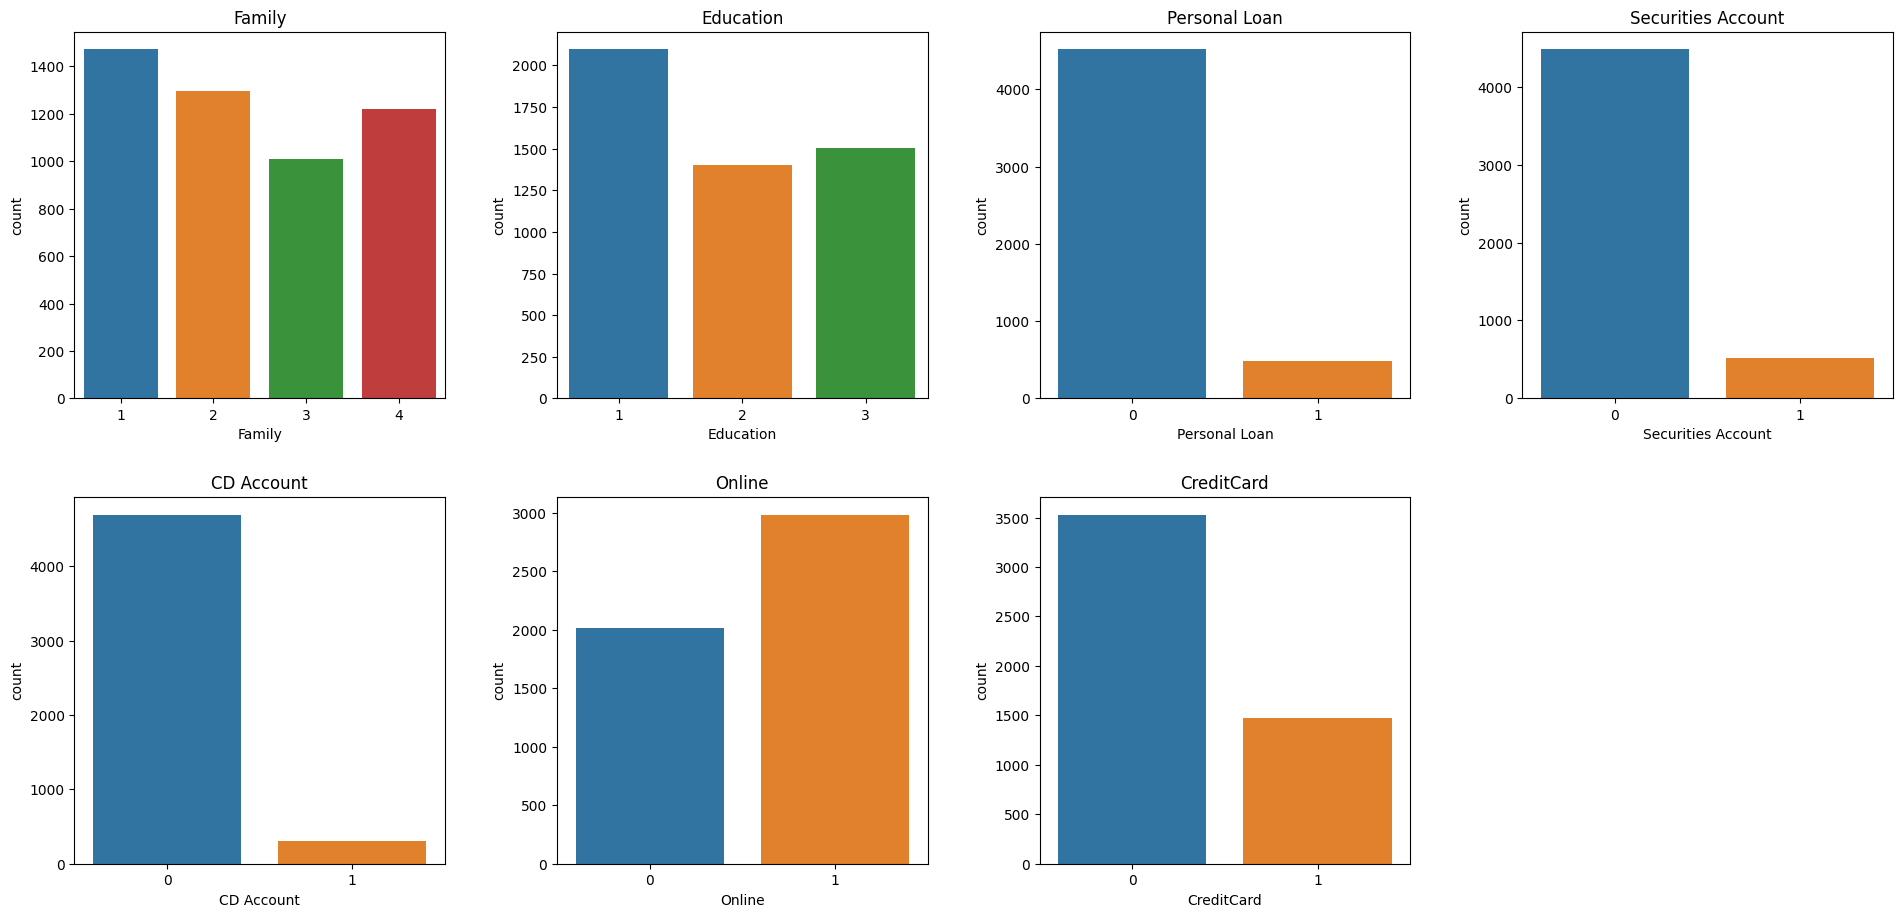

In [21]:
categorical_columns = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
n_cols = 4 
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10)) 
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_num = i % n_cols
    sns.countplot(x=col, data=Data, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.show()


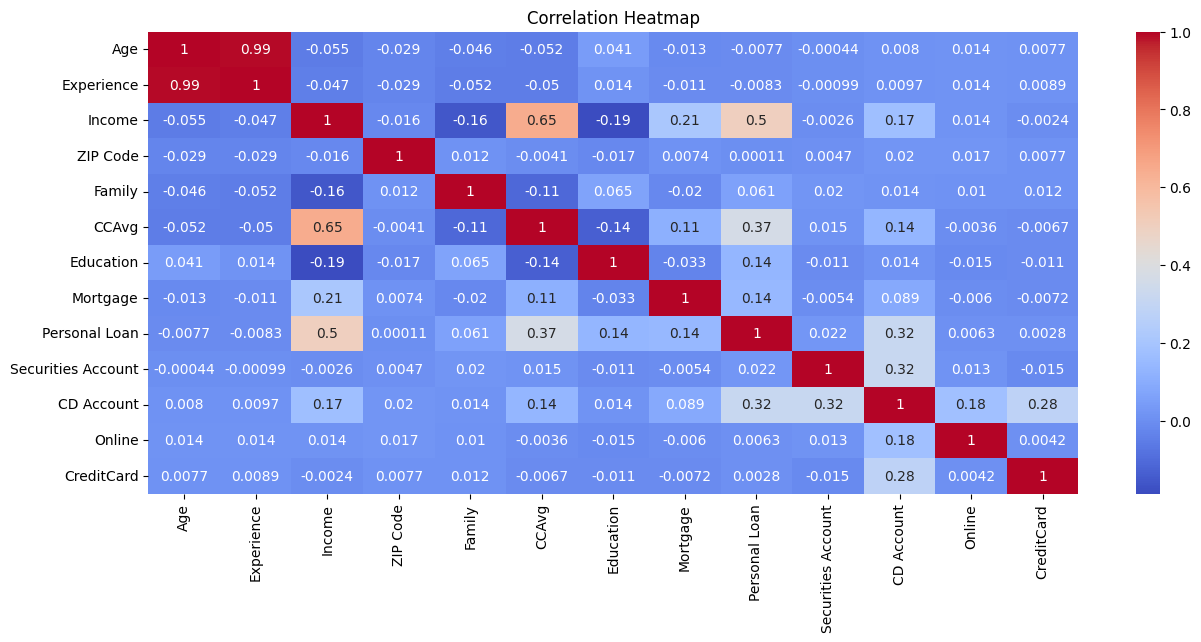

In [22]:
###To visualize the correlation between numerical features:
correlation_matrix = Data.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

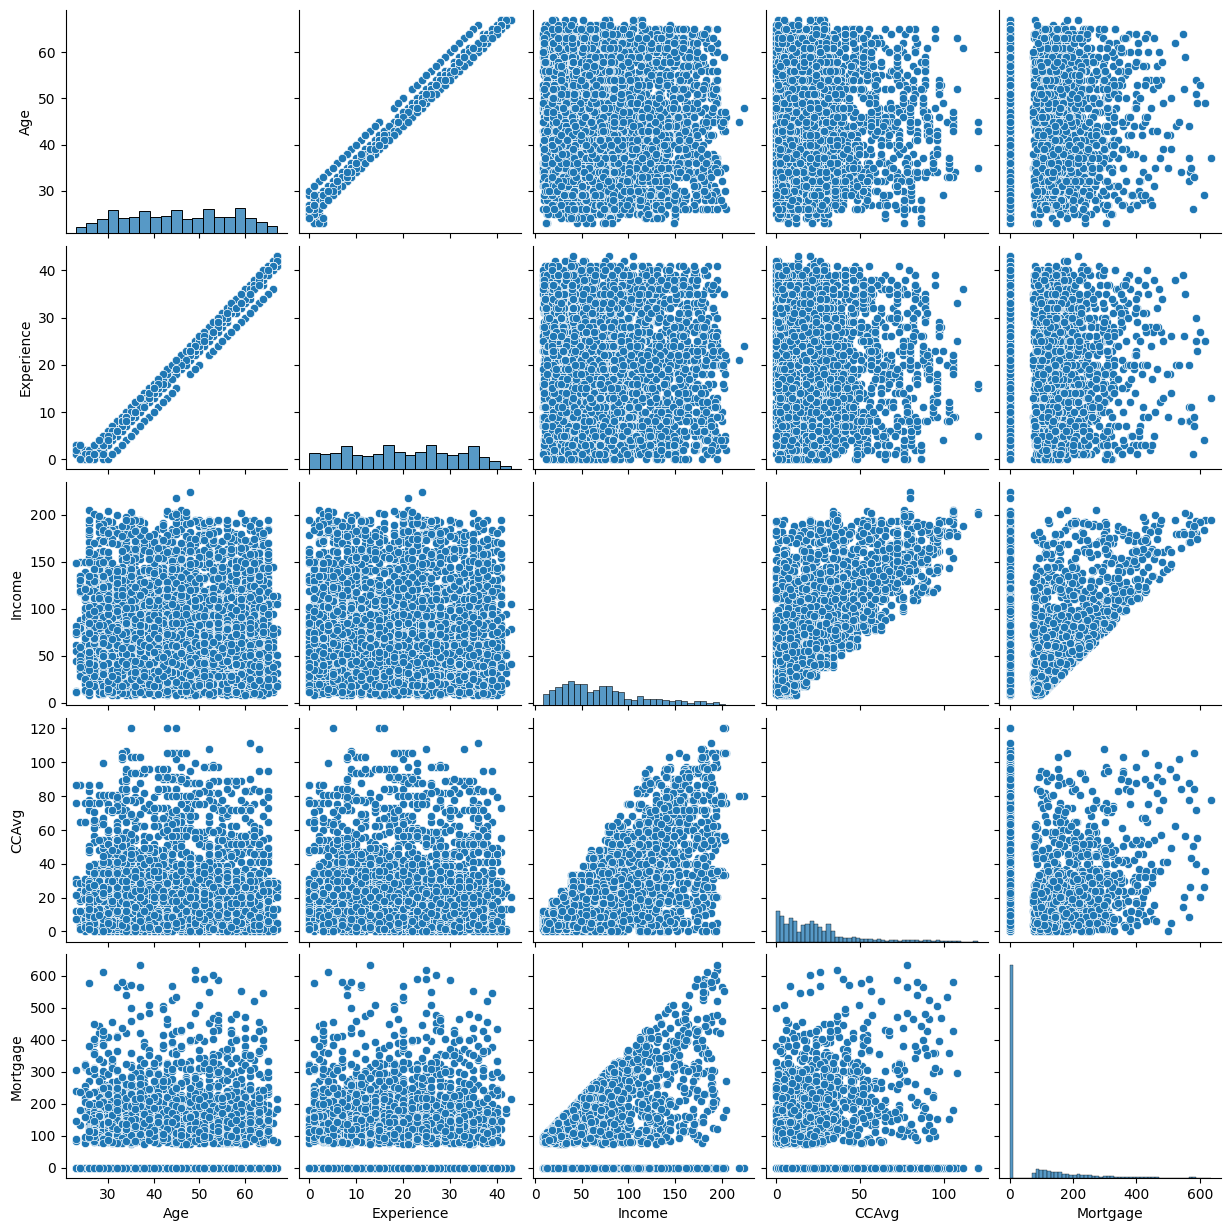

In [23]:
###To observe pairwise relationships and distributions for the Numerical columns
selected_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
sns.pairplot(Data[selected_columns])
plt.show()

##### Relationships between the numerical columns in a dataset.This can reveal correlations within the data.

# 

In [24]:
# Create a scatter plot
plot1 = px.scatter(Data, x='Family', y='Income', color='Personal Loan',
                   title='Family & Income differentiated by Personal Loan',)
plot1.show() 

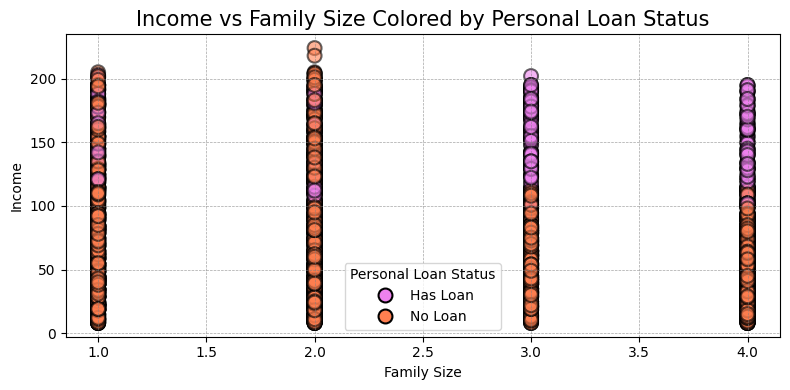

In [25]:
colors = ['violet' if loan else 'coral' for loan in Data['Personal Loan']]
plt.figure(figsize=(8, 4))
scatter = plt.scatter(Data['Family'], Data['Income'], alpha=0.6, c=colors, s=100, edgecolors='black', linewidth=1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.title('Income vs Family Size Colored by Personal Loan Status', fontsize=15)
plt.xlabel('Family Size', fontsize=10)
plt.ylabel('Income', fontsize=10)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Has Loan', markersize=10, markerfacecolor='violet', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='No Loan', markersize=10, markerfacecolor='coral', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=legend_elements, title='Personal Loan Status')
plt.tight_layout()
plt.show()

###### The chart suggests that the demand for loans is higher when there is a larger number of family members, especially when an individual's income is also approximately above 114.

# 

In [26]:
# Create a scatter plot
plot1 = px.scatter(Data, x='Education', y='Income', color='Personal Loan',
                   title='Education & Income differentiated by Personal Loan')
plot1.show() 

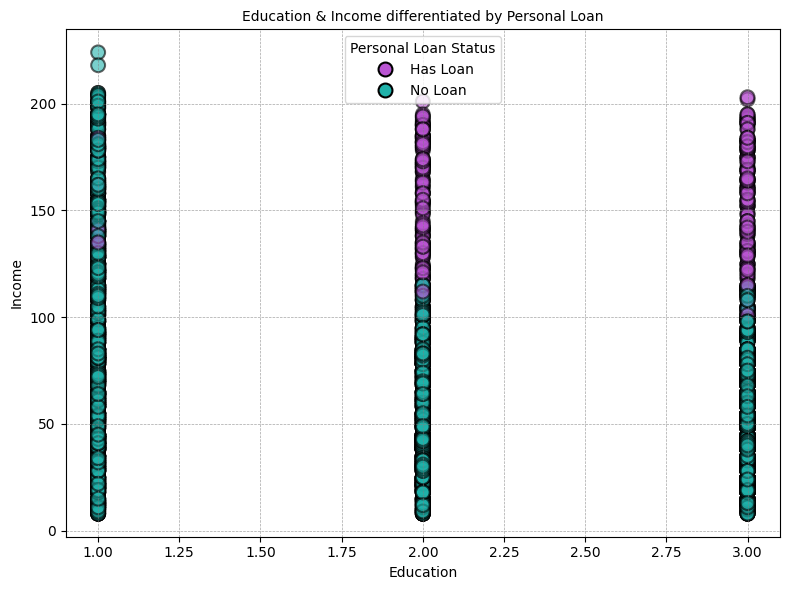

In [27]:
colors = ['mediumorchid' if loan else 'lightseagreen' for loan in Data['Personal Loan']]
plt.figure(figsize=(8, 6))
scatter = plt.scatter(Data['Education'], Data['Income'], alpha=0.6, c=colors, s=100, edgecolors='black', linewidth=1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.title('Education & Income differentiated by Personal Loan', fontsize=10)
plt.xlabel('Education', fontsize=10)
plt.ylabel('Income', fontsize=10)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Has Loan', markersize=10, markerfacecolor='mediumorchid', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='No Loan', markersize=10, markerfacecolor='lightseagreen', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=legend_elements, title='Personal Loan Status')
plt.tight_layout()
plt.show()

##### The chart indicates that the demand for loans increases with higher levels of education, particularly when an individual's income is also approximately above 101. Additionally, the chart shows that at the lowest levels of education, the number of individuals who have taken out loans is very low, even if they have a high income.

# 

In [28]:
# Create a scatter plot
plot1 = px.scatter(Data, x='Income', y='CCAvg', color='Personal Loan',
                   title='Income & CCAvg differentiated by Personal Loan')
plot1.show() 

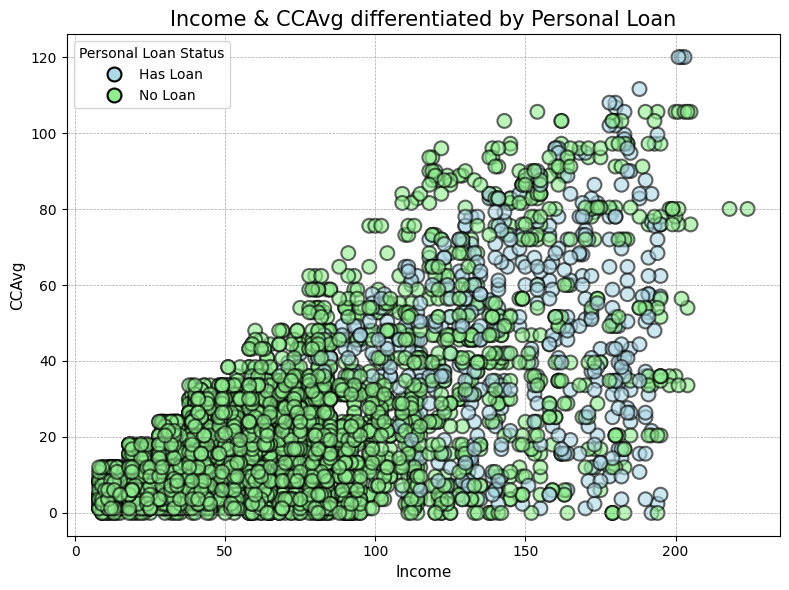

In [29]:
colors = ['lightblue' if loan else 'lightgreen' for loan in Data['Personal Loan']]
plt.figure(figsize=(8, 6))
scatter = plt.scatter(Data['Income'], Data['CCAvg'], alpha=0.6, c=colors, s=100, edgecolors='black', linewidth=1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.title('Income & CCAvg differentiated by Personal Loan', fontsize=15)
plt.xlabel('Income', fontsize=11)
plt.ylabel('CCAvg', fontsize=11)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Has Loan', markersize=10, markerfacecolor='lightblue', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='No Loan', markersize=10, markerfacecolor='lightgreen', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=legend_elements, title='Personal Loan Status')
plt.tight_layout()
plt.show()

###### The chart shows that there is a direct correlation between an individual's income and their average credit card spending (ccavg); in most instances, as these two factors increase, the demand for loans tends to increase as well.Additionally, the chart indicates that individuals with an income of less than 63 have not requested loans so far.

# 

In [30]:
# Create a scatter plot
plot1 = px.scatter(Data, x='Income', y='Mortgage', color='Personal Loan',
                   title='Income & Mortgage differentiated by Personal Loan')
plot1.show() 

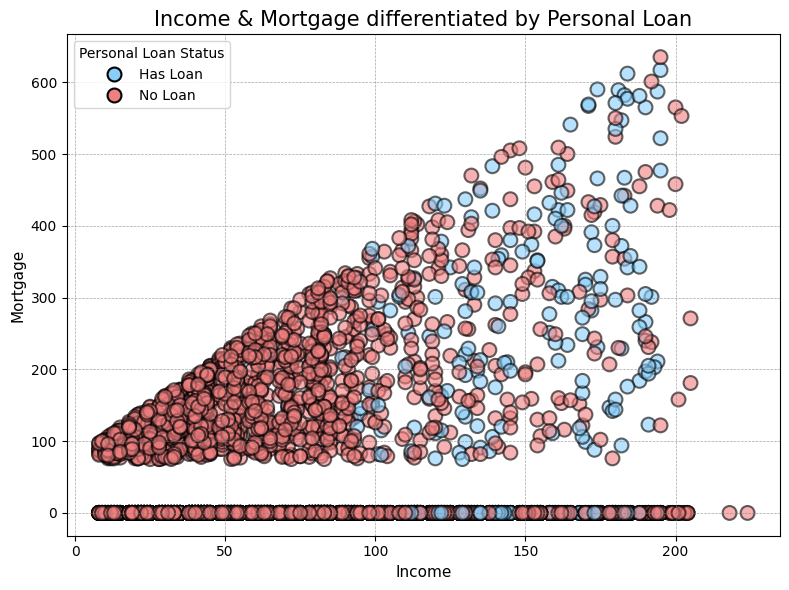

In [31]:
colors = ['lightskyblue' if loan else 'lightcoral' for loan in Data['Personal Loan']]
plt.figure(figsize=(8, 6))
scatter = plt.scatter(Data['Income'], Data['Mortgage'], alpha=0.6, c=colors, s=100, edgecolors='black', linewidth=1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.title('Income & Mortgage differentiated by Personal Loan', fontsize=15)
plt.xlabel('Income', fontsize=11)
plt.ylabel('Mortgage', fontsize=11)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Has Loan', markersize=10, markerfacecolor='lightskyblue', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='No Loan', markersize=10, markerfacecolor='lightcoral', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=legend_elements, title='Personal Loan Status')
plt.tight_layout()
plt.show()

###### The chart indicates that there is a direct relationship between an individual's income and their mortgage, with the demand for loans increasing as both of these items rise. Additionally, the chart shows that individuals with an income of less than 80 have not requested loans, even when the mortgage is high.

# 

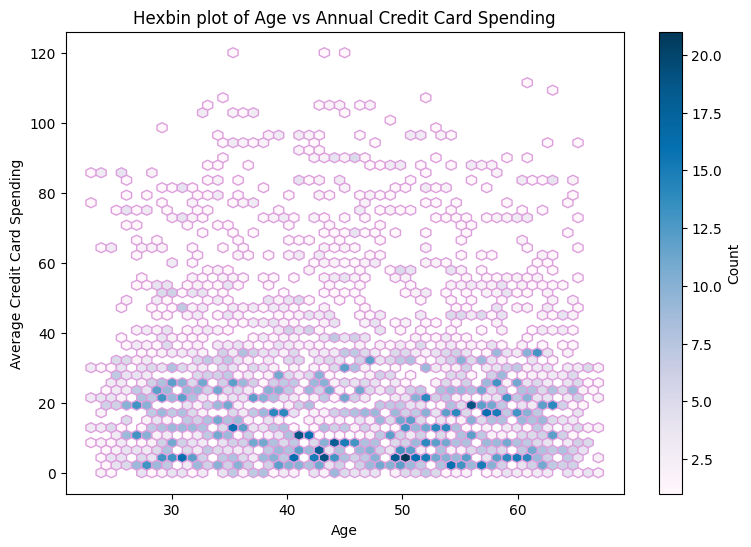

In [32]:
#draw Hexbin
plt.figure(figsize=(9, 6))
plt.hexbin(Data['Age'], Data['CCAvg'], gridsize=50, cmap='PuBu', mincnt=1 , color = "plum")
plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Average Credit Card Spending')
plt.title('Hexbin plot of Age vs Annual Credit Card Spending')
plt.show()

##### This chart shows that the lower an individual's credit score is (for example, less than 38), the higher the likelihood of that individual obtaining a loan.

# 

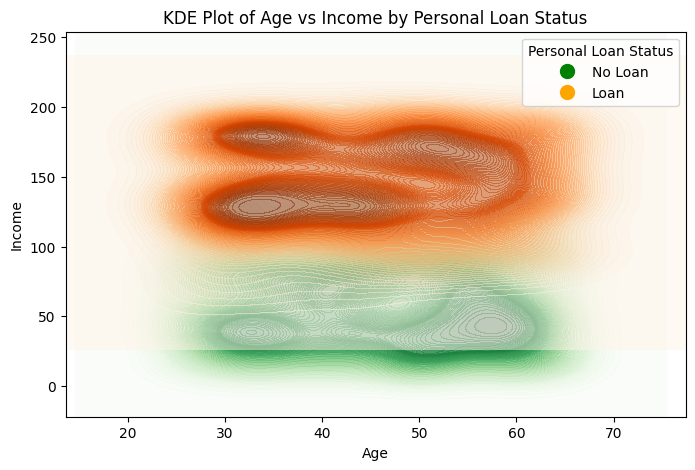

In [33]:
loan_yes = Data[Data['Personal Loan'] == 1]
loan_no = Data[Data['Personal Loan'] == 0]
plt.figure(figsize=(8, 5))
sns.kdeplot(data=loan_no, x="Age", y="Income", fill=True, thresh=0, levels=100, cmap="Greens", alpha=0.5, label='No Loan')
sns.kdeplot(data=loan_yes, x="Age", y="Income", fill=True, thresh=0, levels=100, cmap="Oranges", alpha=0.5, label='Loan')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KDE Plot of Age vs Income by Personal Loan Status')
legend_labels = ['No Loan', 'Loan']
legend_colors = ['green', 'orange']
patches = [plt.Line2D([0], [0], marker='o', markersize=10, color=legend_colors[i],
                      linestyle='none') for i in range(len(legend_labels))]
plt.legend(patches, legend_labels, title='Personal Loan Status', loc='upper right')
plt.show()

##### This plot indicates that for incomes less than 100, no one has taken a personal loan, and also the highest demand for loans is from ages 30 to 45.

# 

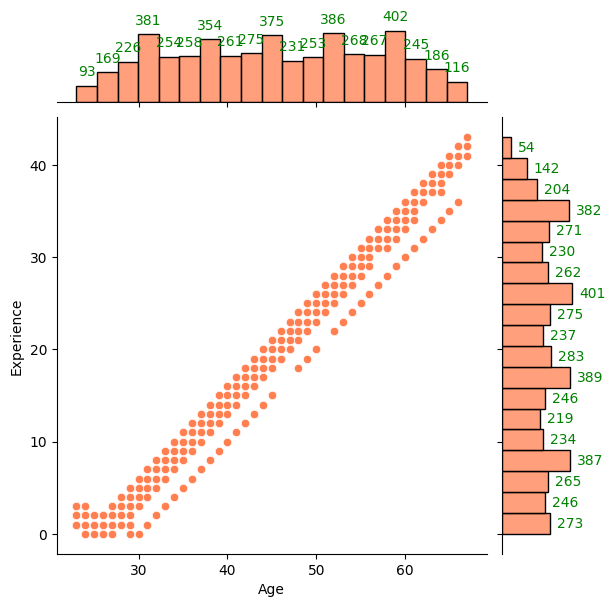

In [34]:
g = sns.jointplot(x='Age', y='Experience', data=Data, kind='scatter', color='coral')
for p in g.ax_marg_x.patches:
    g.ax_marg_x.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', color='green', xytext=(0, 5),
                         textcoords='offset points')

for p in g.ax_marg_y.patches:
    g.ax_marg_y.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                         ha='left', va='center', color='green', xytext=(5, 0),
                         textcoords='offset points')

plt.show()

##### Age and work experience have a very close and direct relationship with each other.

# 

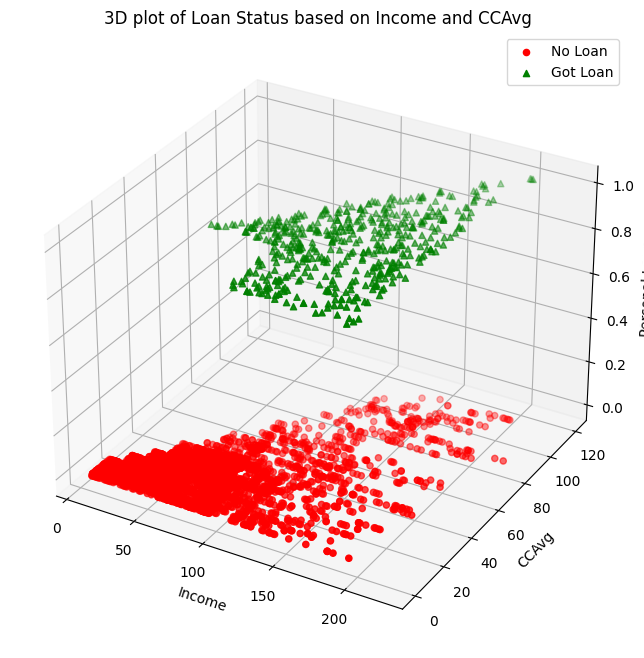

In [35]:
from mpl_toolkits.mplot3d import Axes3D
df_sample = Data[['Income', 'CCAvg', 'Personal Loan']].dropna()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sample[df_sample['Personal Loan'] == 0]['Income'], 
           df_sample[df_sample['Personal Loan'] == 0]['CCAvg'], 
           df_sample[df_sample['Personal Loan'] == 0]['Personal Loan'], c='r', marker='o', label='No Loan')

ax.scatter(df_sample[df_sample['Personal Loan'] == 1]['Income'], 
           df_sample[df_sample['Personal Loan'] == 1]['CCAvg'], 
           df_sample[df_sample['Personal Loan'] == 1]['Personal Loan'], c='g', marker='^', label='Got Loan')

ax.set_xlabel('Income')
ax.set_ylabel('CCAvg')
ax.set_zlabel('Personal Loan')
ax.set_title('3D plot of Loan Status based on Income and CCAvg')
ax.legend()
plt.show()

##### In the chart, we see that individuals who have taken out loans are generally found at higher income levels and have higher average credit card expenses.

# 

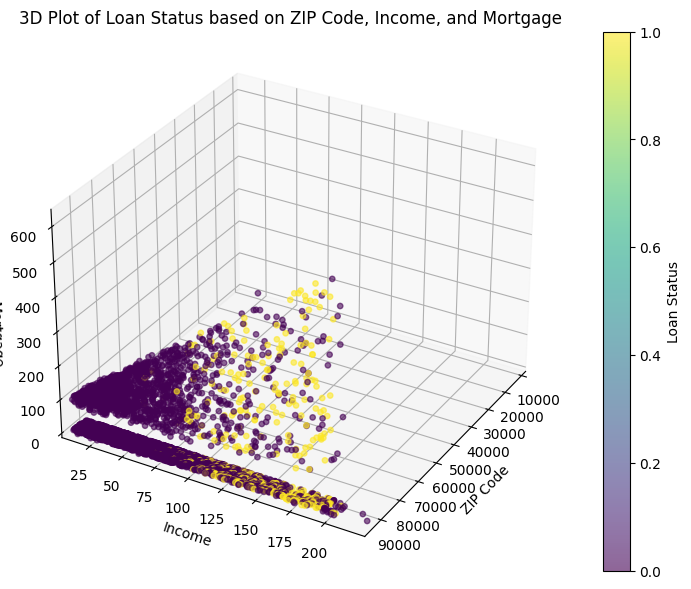

In [36]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    Data['ZIP Code'],
    Data['Income'],
    Data['Mortgage'],
    c=Data['Personal Loan'],
    cmap='viridis',          
    s=15,                   
    alpha=0.6              
)
 
cbar = plt.colorbar(scatter)
cbar.set_label('Loan Status')

ax.grid(True)
ax.set_xlim([Data['ZIP Code'].min(), Data['ZIP Code'].max()])
ax.set_ylim([Data['Income'].min(), Data['Income'].max()])
ax.set_zlim([Data['Mortgage'].min(), Data['Mortgage'].max()])

ax.set_xlabel('ZIP Code')
ax.set_ylabel('Income')
ax.set_zlabel('Mortgage')
ax.set_title('3D Plot of Loan Status based on ZIP Code, Income, and Mortgage')

ax.view_init(elev=30, azim=30) 
plt.show()

##### This could mean that individuals with higher incomes and higher mortgages are more inclined to take out loans, potentially due to better access to financial resources or a greater need for financing in property purchases.

##### Moreover, the chart reveals that there is a high concentration of data for both individuals who have obtained loans and those who have not, specifically within ZIP codes between 40000 and 90000. By using the uszipcode library, we can add the specific cities related to each ZIP code into a new column named "Location". This addition will allow us to draw more informative charts and conduct a more comprehensive analysis by examining the distribution of loans in various urban areas or regions. 

##### zipcode:  9307 (outlier)

# 

## The "Location" column has been added.

In [37]:
!pip install uszipcode

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.5 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6942 sha256=e1097e8d338f3b6125e5d73da2991e505389ef5503650a3b3c201b7d1c478190
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.25
    Uninstalling SQLAlchemy-2.0.25:
      Successfully uninstalled SQLAlchemy-2.0.25
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.

In [38]:
from uszipcode import SearchEngine
search = SearchEngine()

def get_city_from_zip(zip_code):
    result = search.by_zipcode(str(zip_code))
    if result and result.major_city:
        return result.major_city
    else:
        return 'Unknown'
Data['Location'] = Data['ZIP Code'].apply(get_city_from_zip)
Data.head()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4   19.2          1         0   
1   45          19      34     90089       3   18.0          1         0   
2   39          15      11     94720       1   12.0          1         0   
3   35           9     100     94112       1   32.4          2         0   
4   35           8      45     91330       4   12.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

        Location  
0       Pasadena  
1    Los Angeles  
2       Berkeley  
3  San Francisco  
4     Northridge

In [39]:
count_unknown_in_locaion = Data['Location'].value_counts()['Unknown']
count_unknown_in_locaion 

33

In [40]:
unknown_location_data = Data[Data['Location'] == 'Unknown']
personal_loan_values = unknown_location_data['Personal Loan']
personal_loan_counts = personal_loan_values.value_counts()
personal_loan_counts

Personal Loan
0    30
1     3
Name: count, dtype: int64

##### The number of data entries that the US zip code library was unable to identify the corresponding city for is 33. Out of these 33 data points, we determined that 30 individuals had not received a loan, while 3 had received one.

In [41]:
Data['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [42]:
###missing value
Data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Location              0
dtype: int64

In [43]:
city_loans_sorted = Data.groupby('Location')['Personal Loan'].sum().reset_index()
city_loans_sorted = city_loans_sorted.sort_values('Personal Loan', ascending=False)

fig = px.bar(city_loans_sorted, x='Location', y='Personal Loan',
             hover_data=['Location'], labels={'Location': 'City', 'Personal Loan': 'Number of Loans'})

fig.update_layout(title='Number of Personal Loans by City',
                  xaxis_title='City',
                  yaxis_title='Number of Personal Loans',
                  xaxis={'categoryorder':'total descending'})

fig.show()

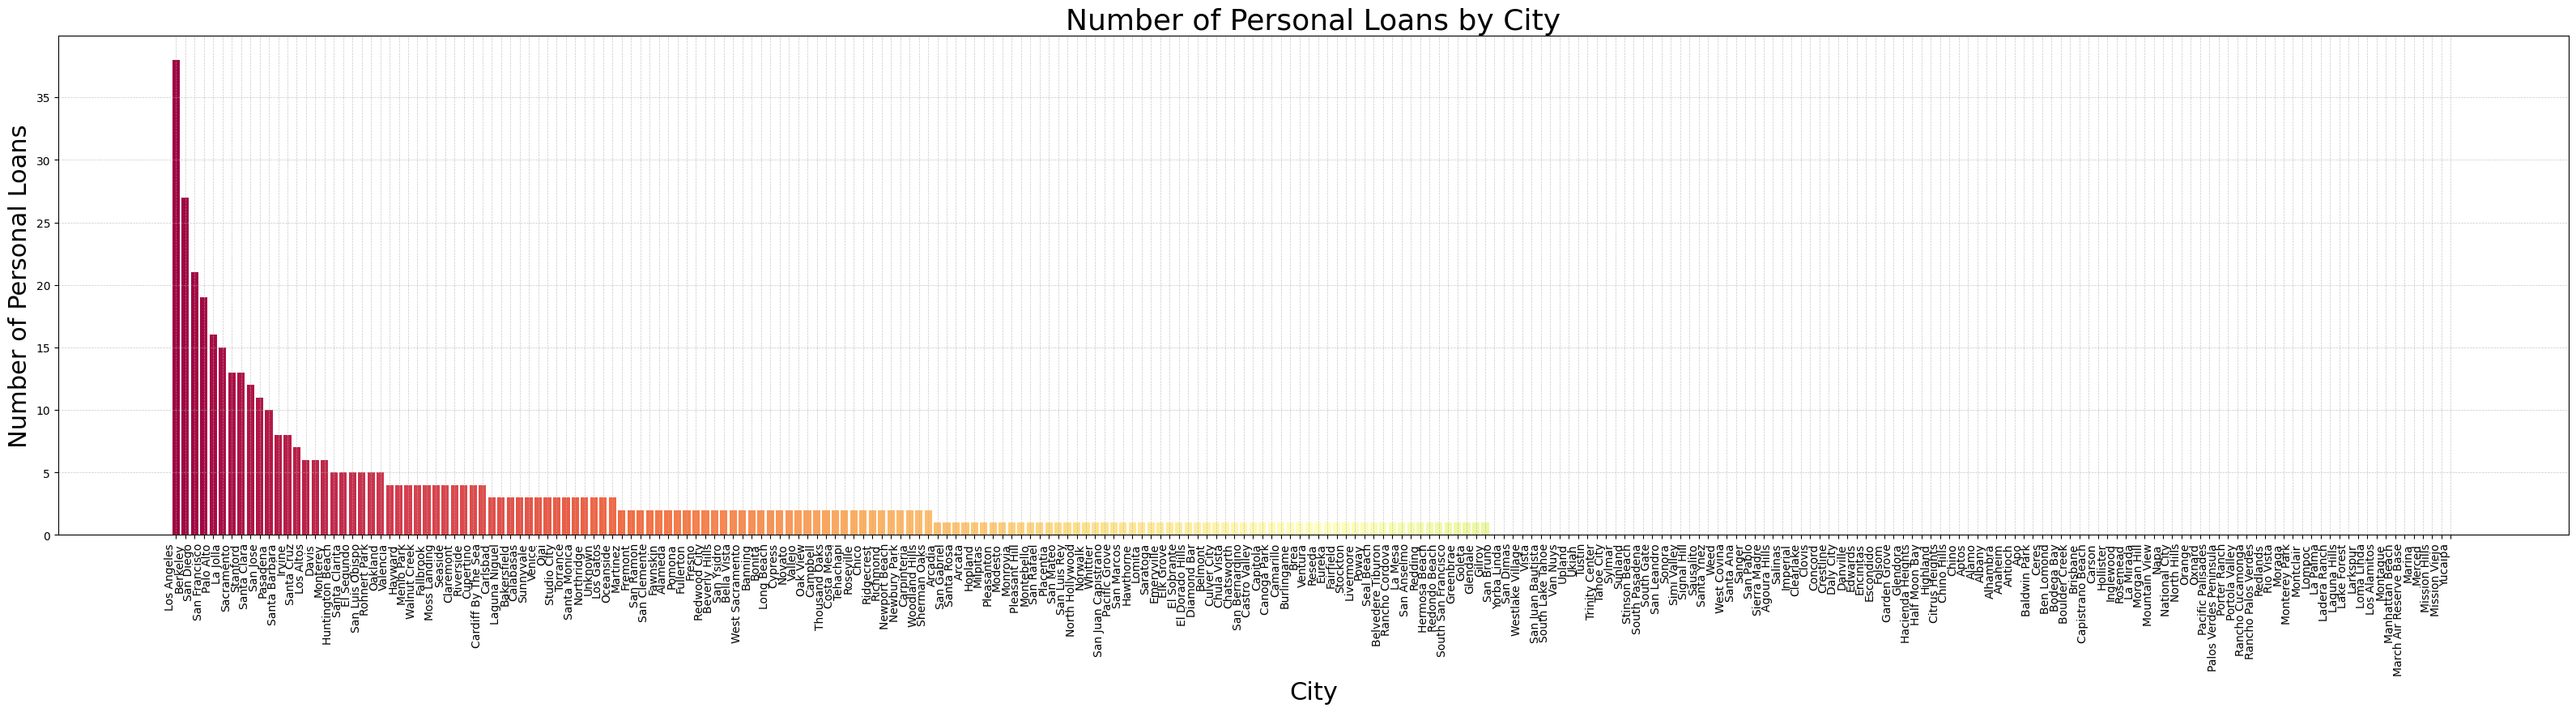

In [44]:
loan_counts = Data.groupby('Location')['Personal Loan'].sum().sort_values(ascending=False)
plt.figure(figsize=(40, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(loan_counts)))
plt.bar(loan_counts.index, loan_counts.values, color=colors)
plt.title('Number of Personal Loans by City', fontsize=26)
plt.xlabel('City', fontsize=22)
plt.ylabel('Number of Personal Loans', fontsize=22)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### The chart shows a steep initial drop-off after Los Angeles, suggesting a significant disparity between the number of loans in Los Angeles and the subsequent cities.
##### The bars decrease in height moving from left to right, showing that other cities have fewer personal loans in comparison to Los Angeles.

# 

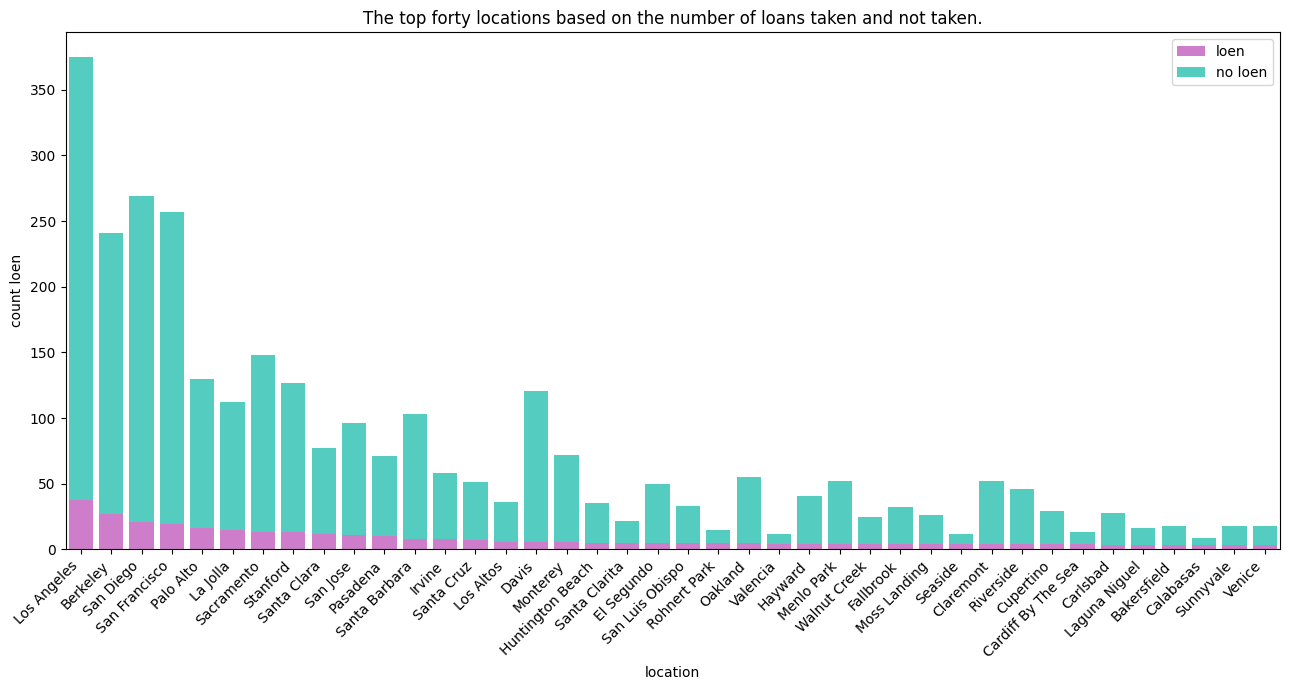

In [45]:
loan_counts = Data.groupby('Location')['Personal Loan'].value_counts().unstack().fillna(0)
sorted_locations = loan_counts.sort_values(by=1, ascending=False).head(40)  
plt.figure(figsize=(13, 7))
sns.barplot(x=sorted_locations.index, y=sorted_locations[1], color='orchid', label='loen')
sns.barplot(x=sorted_locations.index, y=sorted_locations[0], color='turquoise', bottom=sorted_locations[1], label='no loen')

plt.xticks(rotation=45, ha='right')
plt.title('The top forty locations based on the number of loans taken and not taken.')
plt.xlabel('location')
plt.ylabel('count loen')
plt.legend()
plt.tight_layout()  
plt.show()

##### The bar chart you have provided represents the top forty locations sorted by the count of loans taken and not taken. From a visual analysis of this chart, we can observe several points:
##### Los Angeles has the highest number of both loans and no loans, indicating it has the largest sample size among the locations listed.
##### Loan Distribution: The distribution of loans versus no loans varies across locations. Some places like Los Angeles have a substantial number of both, while others show a more significant difference between the two categories.

# 

# 

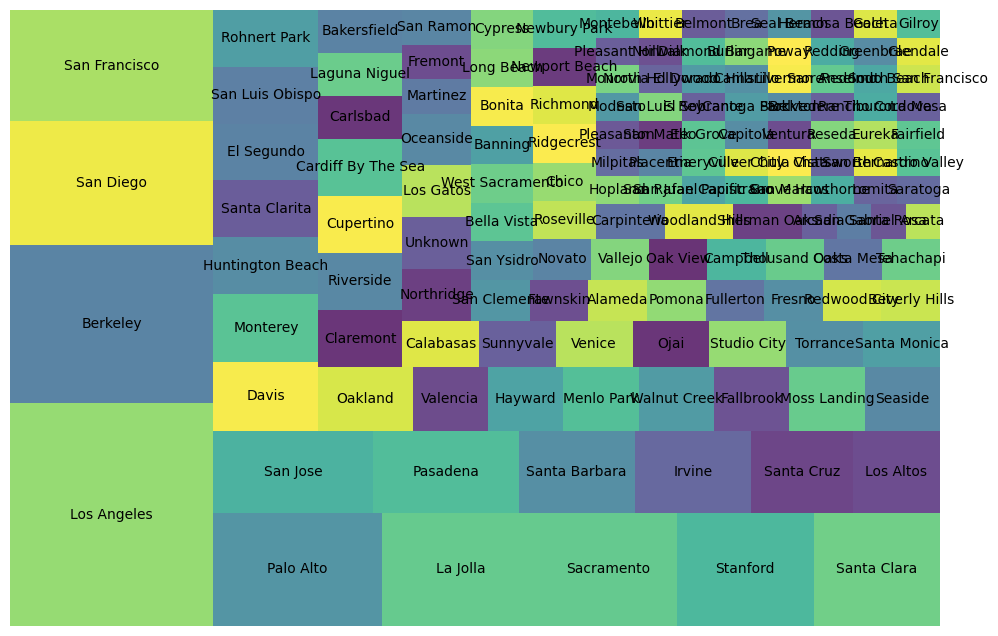

In [46]:
import squarify
location_loan_counts = Data.groupby('Location')['Personal Loan'].sum().sort_values(ascending=False)
location_loan_counts = location_loan_counts[location_loan_counts > 0]
plt.figure(figsize=(12, 8))
squarify.plot(sizes=location_loan_counts, label=location_loan_counts.index, alpha=0.8)
plt.axis('off')
plt.show()


##### The location_loan_counts is filtered to only include locations with more than 0 loans.
##### This series is then sorted in descending order to have the locations with the most loans at the top.


# 

# 

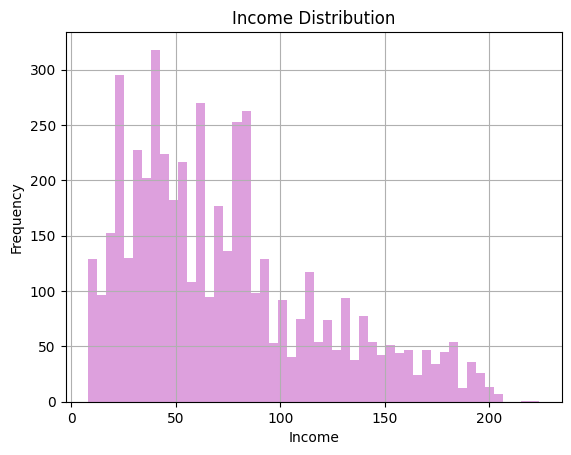

In [47]:
###To visualize the distribution of numerical data like 'Income
Data['Income'].hist(bins=50 , color ='plum')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

###### The histogram depicts income distribution.The highest frequency of income levels falls below 50, showing a concentration in this range. As income increases, the frequency of individuals within each bin decreases, suggesting fewer people have higher incomes.

# 

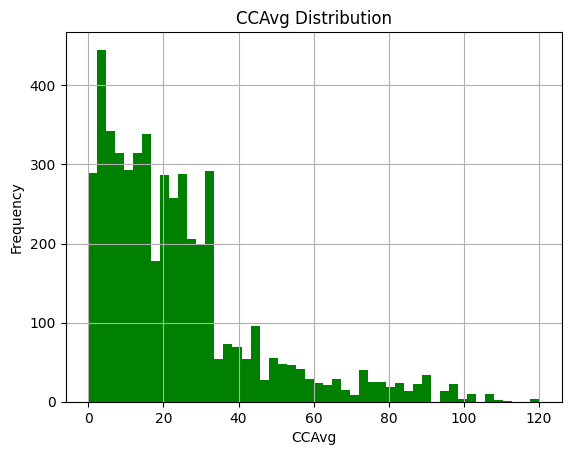

In [48]:
###To visualize the distribution of numerical data like 'CCAvg
Data['CCAvg'].hist(bins=50 , color ='green')
plt.title('CCAvg Distribution')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
plt.show()

###### The histogram displays the distribution of the average monthly credit card spending (CCAvg). This indicates that most individuals have lower credit card usage.

# 

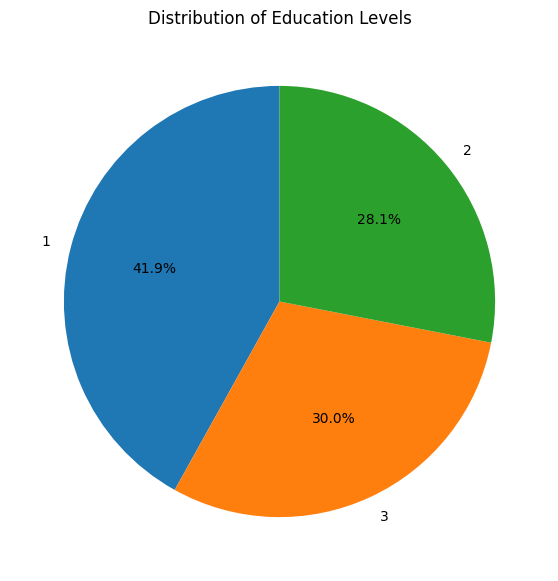

In [49]:
# Count the occurrences of each unique value in the 'Education' column
education_counts = Data['Education'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education Levels')
plt.show()

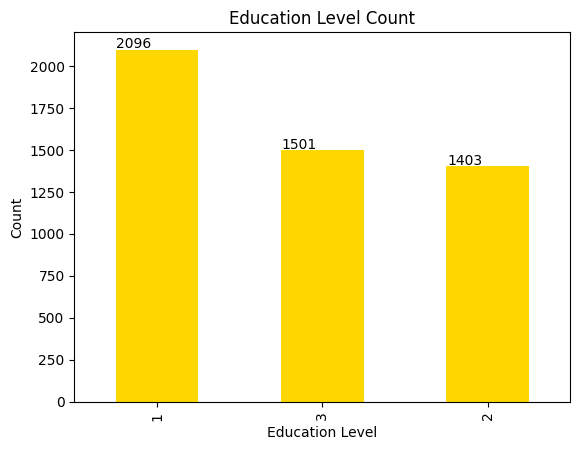

In [50]:
# Count the occurrences of each category in 'Education' column
value_counts = Data['Education'].value_counts()
ax = value_counts.plot(kind='bar', color="gold")
plt.title('Education Level Count')
plt.xlabel('Education Level')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

#### This chart shows that out of these 5000 data points, there are 2096 individuals with education level 1 and 1501 individuals with education level 3, in other words, , 1403 individuals with education level 2.

# 

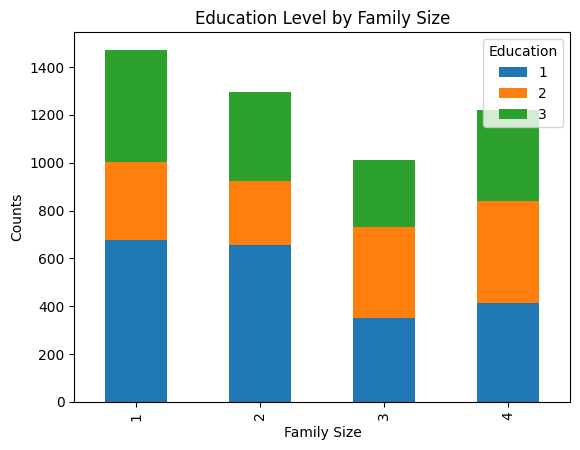

In [51]:
family_education = Data.groupby('Family')['Education'].value_counts().unstack().fillna(0)
family_education.plot(kind='bar', stacked=True)
plt.title('Education Level by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Counts')
plt.show()

##### The bar chart visualizes the count of education levels categorized by family size. It shows that families of size 2 have the highest count across all education levels, with level 1 being the most prevalent education level across all family sizes.

# 

# Identifying Noise and Outlier

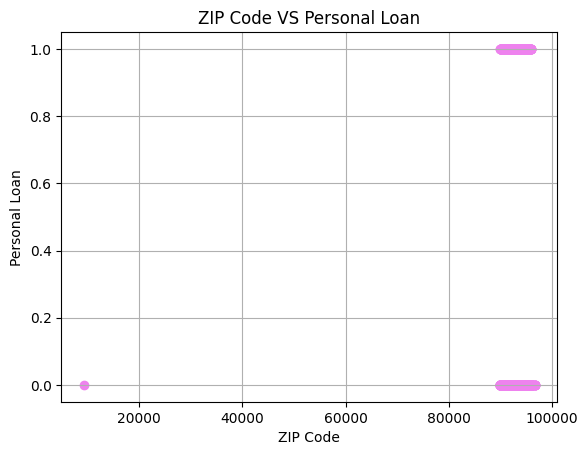

In [52]:
plt.scatter(Data["ZIP Code"] , Data["Personal Loan"], color= "violet")
plt.title("ZIP Code VS Personal Loan")
plt.xlabel("ZIP Code")
plt.ylabel("Personal Loan")
plt.grid()
plt.show()

In [53]:
small = Data['ZIP Code'].nsmallest(1)
small

384    9307
Name: ZIP Code, dtype: int64

In [54]:
c = Data['ZIP Code'].value_counts()
c

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: count, Length: 467, dtype: int64

In [55]:
Data2 = Data[Data["ZIP Code"] > 80000]
Data2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

           Location  
0          Pasadena  
1       Los Angeles  
2          Berkeley  
3     San Francisco  
4        Northridge  
...             ...  
4995         Irvine  
4996       La Jolla  
4997           Ojai  
4998    Los Angeles  
4999         Irvine  

[4999 rows x 14 columns]

### Delete Outlier ZIP Code VS Personal Loan

# 

In [56]:
## Delete "Location" Column
Data2.drop(columns=['Location'], inplace=True)

In [57]:
Data2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4999 rows x 13 columns]

# Create Model

In [58]:
X = Data2.drop('Personal Loan', axis=1)
y = Data2['Personal Loan'].values.reshape(-1 , 1)

### Logistic Regression
### Split X , Y int training and testing test

# Normalyze 1

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='newton-cg'))
])

log_pipeline.fit(X_train, y_train)
y_pred = log_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of logistic regression classifier : {accuracy:.2f}')
print("Accuracy:", log_pipeline.score(X_test, y_test))

Accuracy of logistic regression classifier : 0.96
Accuracy: 0.958


## Normalyze 2

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='newton-cg')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.95
Accuracy: 0.092


#### In the first normalization, numerical features are standardized, and One-Hot Encoding is applied to categorical features, which maintains feature-specific scaling. This approach improves model performance by appropriately scaling features and converting categorical variables into binary vectors, which may increase dimensions but enhances feature distinction.
#### In the second normalization, all features are standardized collectively without differentiating between feature types, offering a simpler but less customized approach. Since the accuracy of the first normalization is higher, we will continue with that method.

# 

In [61]:
print("f1 score:" , metrics.f1_score(y_test , y_pred))

f1 score: 0.6751592356687899


In [62]:
###confusion_matrix
print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.949


In [63]:
print("Accuracy:", log_pipeline.score(X_test, y_test))

Accuracy: 0.958


<function matplotlib.pyplot.show(close=None, block=None)>

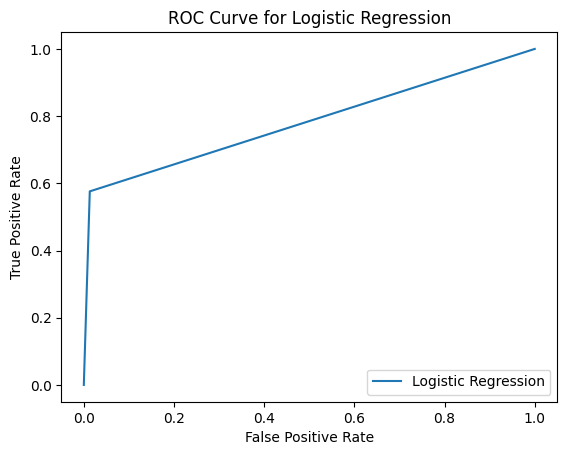

In [64]:
fpr , tpr ,_ = metrics.roc_curve(y_test , y_pred)
plt.plot(fpr , tpr , label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
#plt.legend(loc = 4)
plt.show

#### The chart illustrates how well the logistic regression model you've created performs in distinguishing between two classes. It demonstrates how effectively the model can differentiate between true positives and true negatives.

#### The higher and more to the left the blue line is, the better the model's performance is indicated to be.
#### The closer the line is to the dashed line in the middle of the graph (which represents a random performance), the weaker the model's performance is.
#### In this graph, the blue line trends upward and to the left, suggesting that the model generally performs well.

# 

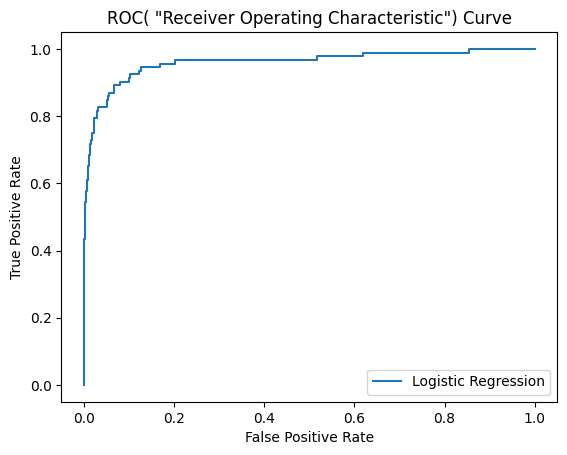

In [65]:
y_pred_proba = log_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC( "Receiver Operating Characteristic") Curve')
plt.legend(loc=4)
plt.show()


#### False Positive Rate (X-axis): A lower FPR is preferred because it means the model is making fewer mistakes on the negative cases.
#### True Positive Rate (Y-axis):  A higher TPR is generally better.

# 

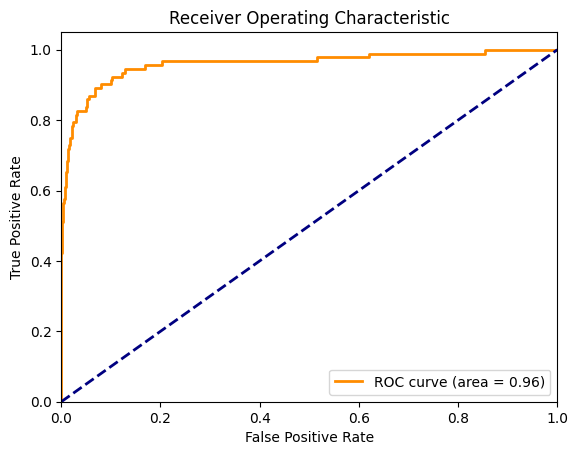

In [66]:
y_pred_proba = log_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### The closer the curve is to the upper left corner of the plot, the better the model's performance.

# 

In [67]:
log_pipeline.classes_

array([0, 1])

In [68]:
logistic_model = log_pipeline.named_steps['classifier']

intercept = logistic_model.intercept_

coefficients = logistic_model.coef_
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: [-3.4896055]
Coefficients: [[ 0.06949255 -0.00926609  2.7717522   0.33411551  0.08029109 -0.79044171
  -1.18177992  1.17247783  0.79974375 -2.41409663  1.11463874  1.29945784
   0.31393661 -0.31393666 -1.55906725  1.5590672   0.23703617 -0.23703622
   0.38630444 -0.38630449]]


In [69]:
log_pipeline.predict_proba(X)

array([[9.99690332e-01, 3.09668489e-04],
       [9.99799779e-01, 2.00221166e-04],
       [9.99988264e-01, 1.17364630e-05],
       ...,
       [9.99297769e-01, 7.02231253e-04],
       [9.82402908e-01, 1.75970916e-02],
       [9.98389697e-01, 1.61030291e-03]])

In [70]:
log_pipeline.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
log_pipeline.score(X ,y)

0.9601920384076815

In [72]:
confusion_matrix(y , log_pipeline.predict(X))

array([[4477,   42],
       [ 157,  323]])

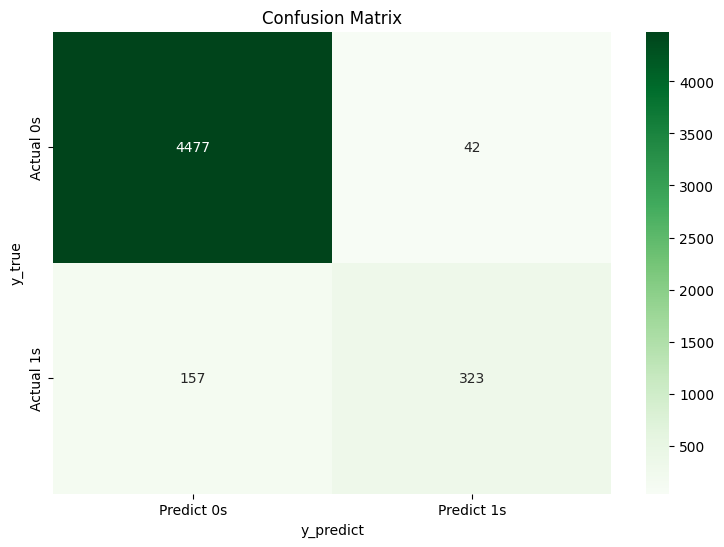

In [73]:
conf_matrix = confusion_matrix(y, log_pipeline.predict(X))
tick_labels_x = ['Predict 0s', 'Predict 1s'] 
tick_labels_y = ['Actual 0s', 'Actual 1s'] 
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greens', xticklabels=tick_labels_x, yticklabels=tick_labels_y)
plt.title('Confusion Matrix')
plt.xlabel('y_predict')
plt.ylabel('y_true')
plt.show()

#### TP:In this chart, it indicates that there are 4477 instances where the actual label was 0 and the model also predicted 0, meaning that in reality, the loan was not taken, and the model also predicted that no loan was taken.


#### TN:In this chart, it says that there are 323 instances where the actual label was 1 and the model also predicted 1, meaning that in reality, the loan was taken, and the model also predicted that a loan was taken.

#### FN:In this chart, it indicates that there are 157 instances where the actual label was 1, but the model predicted 0, meaning that in reality, the loan was taken, but the model predicted that no loan was taken.

#### FP:In this chart, it says that there are 42 instances where the actual label was 0, but the model predicted 1, meaning that in reality, no loan was taken, but the model predicted that a loan was taken.

### We have a total of 4999 datasets, of which the model has correctly identified 4800 and incorrectly predicted 199 data points.

# 

In [74]:
print(classification_report(y ,log_pipeline.predict(X)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4519
           1       0.88      0.67      0.76       480

    accuracy                           0.96      4999
   macro avg       0.93      0.83      0.87      4999
weighted avg       0.96      0.96      0.96      4999



##### The report indicates that for class 0, which generally represents those who did not take a loan and usually constitutes the majority class, the model exhibits very high precision with a score of 0.97 and recall of 0.99, leading to an excellent F1-score of 0.98. This reflects the model's high effectiveness in identifying class 0 with both accuracy and broad coverage.

##### For class 1, which typically represents those who took a loan and is often the minority class, there is a reasonably high precision of 0.89, but the recall is notably lower at 0.67, impacting the F1-score, which drops to 0.76. This indicates that while the model is fairly good at predicting class 1 when it does predict it, it misses a significant number of true instances of class 1.

##### The overall model accuracy is 0.96, which is quite impressive.

# 

# 

# Improve Model

## Cross Validation

In [75]:
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='sag', max_iter=5000))
])

param_grid = {
    'classifier__penalty': ['l2', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__warm_start': [False, True]
}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search = GridSearchCV(pipeline2, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=kf)

In [76]:
# Fit the model using grid search
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Experience',
                                                                          'Income',
                                                                          'CCAvg',
                                                                          'Mortgage']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Family',
                                                                          'Education',
                                                                          'Securities '
                                                                          'Account',
                                                                          'CD '
                                                                          'Account',
                                                                          'Online',
                                                                          'CreditCard'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=5000,
                                                           solver='sag'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l2', 'none'],
                         'classifier__warm_start': [False, True]},
             scoring='accuracy')

In [77]:
# Score the model using the best estimator found
accuracy = grid_search.score(X_test, y_test)

print(f"Accuracy : {accuracy}")

Accuracy : 0.958


In [78]:
# Predict using the best model
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.958

In [79]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'none', 'classifier__warm_start': False}
0.9597390488110138


In [80]:
k_fold = KFold(5)
result= cross_val_score(grid_search ,X,y.ravel() , cv = k_fold , n_jobs = 1 )
print(result)
print(np.mean(result))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[0.959      0.951      0.958      0.956      0.96396396]
0.9575927927927929


### All the folds are good.

In [81]:
print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.958


# 

# Dimension

In [82]:
def check(Dimension, testsize):
    acc =0.952 
    X_copy = X.copy() 
    
    for column in X_copy:
        New_col_name = column + str(Dimension)
        if New_col_name not in X_copy.columns:
            New_col_val = X_copy[column] ** Dimension
            X_copy[New_col_name] = New_col_val 
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=testsize, random_state=0)
    
    new_model_log = LogisticRegression(solver='newton-cg')
    new_model_log.fit(X_train, y_train)
    
    y_pred = new_model_log.predict(X_test)
    acc_new = accuracy_score(y_test, y_pred)
    if acc_new < acc:
        X_copy.drop([New_col_name for column in X], axis=1, inplace=True)
    else:
        acc = acc_new
    print("Accuracy", acc)
check(2, 0.2)

Accuracy 0.952


In [83]:
X

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0           0  
2                      0           0       0           0  
3                      0           0       0           0  
4                      0           0       0           1  
...                  ...         ...     ...         ...  
4995                   0           0       1           0  
4996                   0           0       1           0  
4997                   0           0       0           0  
4998                   0           0       1           0  
4999                   0           0       1           1  

[4999 rows x 12 columns]

#### Dimensions were not added.

# 

# Predict of Giver Data for LogisticRegression Model

In [84]:
df2 = pd.DataFrame({'Age': [42], 
                    'Experience':[16] ,
                    'Income': [30], 
                    'ZIP Code':[92037] ,
                    'Family': [3], 
                    'CCAvg': [1.2],
                    'Education': [1], 
                    'Mortgage': [0],
                    'Securities Account': [1],
                    'CD Account': [0], 
                    'Online' :[1], 
                    'CreditCard': [1],
                    'Personal Loan': [0]
                   })

In [85]:
datareg = pd.concat([Data2, df2])
datareg

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   
0      42          16      30     92037       3    1.2          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  
0                 0                   1           0       1           1  

[5000 rows x 13 columns]

In [86]:
X_train = datareg[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']][:4999]
Y_train = datareg['Personal Loan'][:4999].values
X_test = datareg[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']][4999:]

In [87]:
logmodel = LogisticRegression(solver= 'newton-cg' , C = 10.0 , random_state=0)
logmodel.fit(X_train,Y_train.ravel())

LogisticRegression(C=10.0, random_state=0, solver='newton-cg')

In [88]:
print(X_train.shape)
print(Y_train.shape)


(4999, 12)
(4999,)


In [89]:
Y_pred = logmodel.predict(X_test)
Y_pred

array([0])

### The final answer is zero, which indicates that the individual in question will not accept the loan offer.

# 

# Compelement Naive Bayes

In [90]:
X= pd.DataFrame(Data2 , columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage',
                                   'Securities Account','CD Account', 'Online', 'CreditCard'])
y= Data2['Personal Loan'].values.reshape(-1 , 1)#target variable

In [91]:
X_train , X_test , y_train , y_test =train_test_split(X ,y ,test_size = 0.20, random_state= 0)
model_Nb = ComplementNB()
model_Nb.fit(X_train, y_train.ravel())
y_pred = model_Nb.predict(X_test)

In [92]:
print("f1 score:" , metrics.f1_score(y_test , y_pred))

f1 score: 0.38323353293413176


In [93]:
print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.794


##### Naive Bayes is not suitable for this algorithm.

# Predict of Giver Data for Compelement Naive Bayes Model

In [94]:
df4 = pd.DataFrame({'Age': [42], 
                    'Experience':[16] ,
                    'Income': [30], 
                    'ZIP Code':[92037] ,
                    'Family': [3], 
                    'CCAvg': [1.2],
                    'Education': [1], 
                    'Mortgage': [0],
                    'Securities Account': [1],
                    'CD Account': [0], 
                    'Online' :[1], 
                    'CreditCard': [1],
                    'Personal Loan': [0]
                   })

In [95]:
dataNB = pd.concat([Data2, df4])
dataNB

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   
0      42          16      30     92037       3    1.2          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  
0                 0                   1           0       1           1  

[5000 rows x 13 columns]

In [96]:
X_train = dataNB[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']][:4999]
Y_train = dataNB['Personal Loan'][:4999].values
X_test = dataNB[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']][4999:]

In [97]:
NBmodel = ComplementNB()
NBmodel.fit(X_train,Y_train.ravel())

ComplementNB()

In [98]:
Y_pred = NBmodel.predict(X_test)
Y_pred

array([0])

### The final answer is zero, which indicates that the individual in question will not accept the loan offer.

# 

# KNN

In [99]:
X = Data2.drop('Personal Loan', axis=1).values
Y= Data2['Personal Loan'].values.reshape(-1 , 1) #target variable
X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

In [100]:
X_train , X_test , y_train , y_test =train_test_split(X ,y ,test_size = 0.20, random_state= 0)

In [101]:
###assign a value to k manually.
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.794


In [102]:
k=20
acc1=np.zeros(k)
for i in range (1 , k+1):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train.ravel())
    y_pred = knn_model.predict(X_test)
    acc1[i-1] = metrics.accuracy_score(y_test , y_pred)
acc1

array([0.889, 0.894, 0.893, 0.895, 0.903, 0.903, 0.895, 0.901, 0.902,
       0.901, 0.9  , 0.903, 0.9  , 0.896, 0.9  , 0.901, 0.899, 0.9  ,
       0.897, 0.9  ])

In [103]:
print(np.max(acc1))
print(np.min(acc1))

0.903
0.889


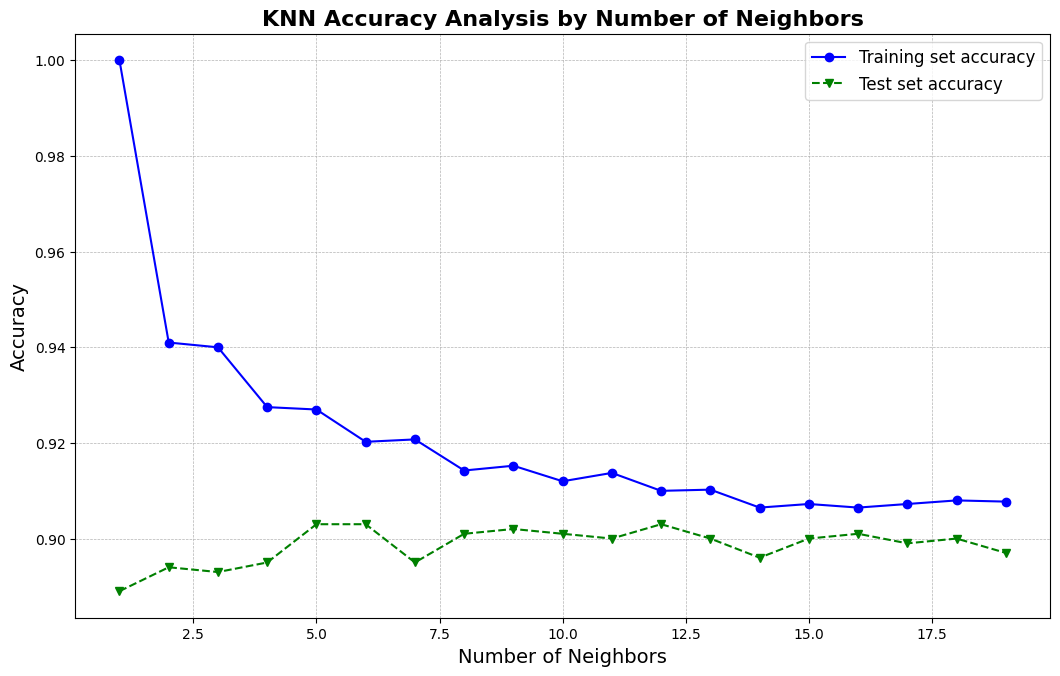

In [104]:
training_accuracy = []
testing_accuracy = []
neighbors_settings = range(1, 20)

for n in neighbors_settings:
    modelknn = KNeighborsClassifier(n_neighbors=n)
    modelknn.fit(X_train, y_train.ravel())
    training_accuracy.append(modelknn.score(X_train, y_train))
    testing_accuracy.append(modelknn.score(X_test, y_test))
plt.figure(figsize=(13, 8))
plt.plot(neighbors_settings, training_accuracy, marker='o', linestyle='-', 
         color='blue', label='Training set accuracy')
plt.plot(neighbors_settings, testing_accuracy, marker='v', linestyle='--', 
         color='green', label='Test set accuracy')
plt.title('KNN Accuracy Analysis by Number of Neighbors', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neighbors', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, linestyle='--', linewidth=0.5, color='.7')
plt.subplots_adjust(bottom=0.15, left=0.15)
plt.show()

#### Based on the chart, the optimal number of neighbors for the KNN classifier seems to be around 7, as this point marks the peak accuracy for the test data set before it begins to decline and then level off.

#### k=7 is good and optimized.

In [105]:
print(np.max(training_accuracy))
print(np.max(testing_accuracy))

1.0
0.903


In [106]:
knn_model = KNeighborsClassifier(7)
knn_model.fit(X_train, y_train.ravel())
y_pred = knn_model.predict(X_test)

In [107]:
print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.895


In [108]:
confusion_matrix(Y , modelknn.predict(X))

array([[4489,   30],
       [ 442,   38]])

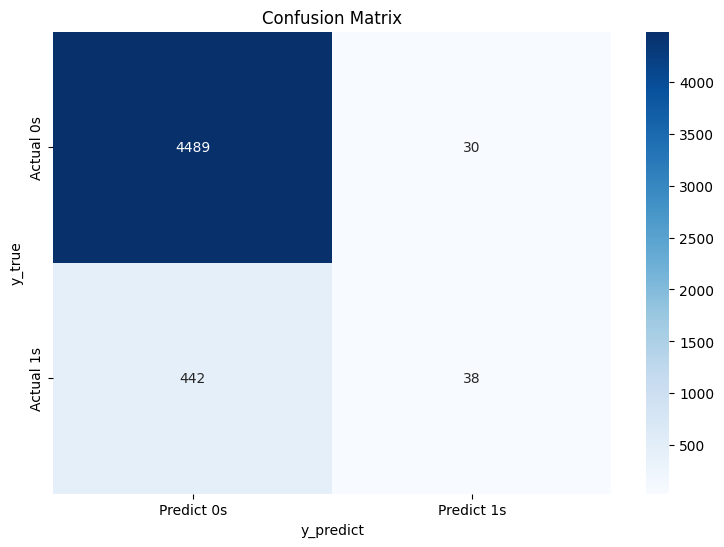

In [109]:
conf_matrix = confusion_matrix(Y, modelknn.predict(X)) # اینجا از conf_matrix1 به conf_matrix تغییر داده‌ام
tick_labels_x = ['Predict 0s', 'Predict 1s'] 
tick_labels_y = ['Actual 0s', 'Actual 1s'] 
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=tick_labels_x, yticklabels=tick_labels_y)
plt.title('Confusion Matrix')
plt.xlabel('y_predict')
plt.ylabel('y_true')
plt.show()


#### TP:In this chart, it indicates that there are 4489 instances where the actual label was 0 and the model also predicted 0, meaning that in reality, the loan was not taken, and the model also predicted that no loan was taken.

#### TN:In this chart, it says that there are38 instances where the actual label was 1 and the model also predicted 1, meaning that in reality, the loan was taken, and the model also predicted that a loan was taken.

#### FN:In this chart, it indicates that there are 442 instances where the actual label was 1, but the model predicted 0, meaning that in reality, the loan was taken, but the model predicted that no loan was taken

#### FP:In this chart, it says that there are 30 instances where the actual label was 0, but the model predicted 1, meaning that in reality, no loan was taken, but the model predicted that a loan was taken.

### We have a total of 4999 datasets, of which the model has correctly identified 4562 and incorrectly predicted 437 data points.

In [110]:
print(classification_report(Y ,modelknn.predict(X)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4519
           1       0.56      0.08      0.14       480

    accuracy                           0.91      4999
   macro avg       0.73      0.54      0.54      4999
weighted avg       0.88      0.91      0.87      4999



#### The classification report shows that for class 0, the model (presumably a KNN classifier) has a high precision of 0.91 and a very high recall of 0.99, resulting in an F1-score of 0.95. This indicates that the model is highly effective at identifying class 0 instances, with very few false negatives.

#### For class 1, however, the model has significantly lower precision and recall scores, at 0.56 and 0.08 respectively, leading to a poor F1-score of 0.14. This suggests that the model struggles to correctly identify class 1 instances, with a high number of false negatives and false positives.

#### Overall, the model's accuracy is 0.91, which seems high, but the macro average and weighted average scores reveal underlying issues with class 1 predictions.

# 

# Improve Model kNN

In [111]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1,20)}

search2 = GridSearchCV(estimator=modelknn,
                           param_grid=parameters, 
                           scoring='f1',         
                           cv=5,                 
                           verbose=1,           
                           n_jobs=-1)            
search2.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='f1', verbose=1)

In [112]:
print(search2.best_params_)
print(search2.best_score_)

{'n_neighbors': 1}
0.38283593417796924


# 

# Predict of Giver Data for KNN  Model

In [113]:
df3 = pd.DataFrame({'Age': [42], 
                    'Experience':[16] ,
                    'Income': [30], 
                    'ZIP Code':[92037] ,
                    'Family': [3], 
                    'CCAvg': [1.2],
                    'Education': [1], 
                    'Mortgage': [0],
                    'Securities Account': [1],
                    'CD Account': [0], 
                    'Online' :[1], 
                    'CreditCard': [1],
                    'Personal Loan': [0]
                   })

In [114]:
dataknn = pd.concat([Data2, df3])
dataknn

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   
0      42          16      30     92037       3    1.2          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  
0                 0                   1           0       1           1  

[5000 rows x 13 columns]

In [115]:
X_train = datareg[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']][:4999]
Y_train = datareg['Personal Loan'][:4999].values
X_test = datareg[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']][4999:]

In [116]:
k = 7
model_knn = KNeighborsClassifier(n_neighbors=k) 
model_knn.fit(X_train, Y_train.ravel())  


KNeighborsClassifier(n_neighbors=7)

In [117]:
Y_pred = model_knn.predict(X_test)
Y_pred

array([0])

## The final answer is zero, which indicates that the individual in question will not accept the loan offer.

# 

# Analyzing logistic regression and k-nearest neighbors models based on the confusion matrix:

#### 1- After evaluating the confusion matrices for both KNN and Logistic Regression, we have determined that Logistic Regression is superior in terms of accuracy.
#### 2- However, in terms of the cost function, KNN is better because it has fewer false positives (FP), meaning those who in reality did not take a loan but the model predicted they did. The greater the number of false positives, the higher our cost function becomes, which is detrimental to the bank.

# 

# The new input added to the dataset has indicated that all three models predict that the individual does not qualify for a loan.

# Done